## TEXT CLASSIFICATION

### Prepare

In [1]:
# Import library python

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import requests
import random
import re

In [3]:
# Check GPU

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
# Add helper function

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
response = requests.get(url)
with open("helper_functions.py", "wb") as file:
    file.write(response.content)
print("'helper_functions.py'")

'helper_functions.py'


In [5]:
# Import series of helper functions for the notebook

from helper_functions import create_tensorboard_callback, plot_loss_curves, calculate_results

### Visualize data

In [6]:
df_data = pd.read_csv('Tweets.csv')
df_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#### encode

In [7]:
#Encoding Categorical to Numeric 

label_encode={"airline_sentiment": {"negative":0,"neutral" :1,"positive":2}}
df_data=df_data.replace(label_encode)

#### cleansing text

In [8]:
def cleansing(df_data):
    df_clean_shuffled = df_data.str.lower()
    df_clean_shuffled = [re.sub(r'[^\w\s]', '', i) for i in df_clean_shuffled]
    df_clean_shuffled = [re.sub(r'http\S+|www\S+|pic.twitter.com\S+|\S+.com\S+', '', i) for i in df_clean_shuffled]
    df_clean_shuffled = [re.sub(r'\s+', ' ', i) for i in df_clean_shuffled]
    return df_clean_shuffled

In [9]:
df_data['clean_text'] = cleansing(df_data['text'])
df_data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,1,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica what dhepburn said
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve to the experience tacky
2,570301083672813571,1,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica i didnt today must mean i need t...
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica its really aggressive to blast o...
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica and its a really big bad thing a...


#### shuffled

**<center>df.sample(frac=1, random_state=42)</center>**

<font size="3"> Fungsi sample digunakan untuk mengambil sampel acak dari DataFrame. Parameter frac=1 berarti kita mengambil   seluruh baris DataFrame (100% dari total baris). Dengan kata lain, ini adalah cara untuk mengacak DataFrame. Parameter random_state=42 digunakan untuk membuat hasil pengacakan menjadi dapat direproduksi. Dengan menggunakan nilai seed (42 dalam hal ini), hasil acak akan tetap sama setiap kali kita menjalankan code ini. </font>

<font size="3"> Secara keseluruhan, code ini digunakan untuk mengacak baris-baris dalam DataFrame df dengan tujuan untuk memastikan bahwa urutan data tidak mempengaruhi pembelajaran model. Mengacak data dapat membantu meningkatkan keberagaman data yang diberikan kepada model selama pelatihan. </font>

In [10]:
# Shuffle training dataframe
# shuffle with random_state=42 for reproducibility

df_shuffled = df_data.sample(frac=1, random_state=42) 
df_shuffled.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
4794,569731104070115329,2,1.0000,NaN,NaN,Southwest,NaN,JasmineDT,NaN,1,@SouthwestAir you're my early frontrunner for ...,NaN,2015-02-22 21:30:54 -0800,Washington D.C.,Eastern Time (US & Canada),southwestair youre my early frontrunner for be...
10480,569263373092823040,0,1.0000,Cancelled Flight,1.0000,US Airways,NaN,ElizabethFrayer,NaN,0,@USAirways how is it that my flt to EWR was Ca...,NaN,2015-02-21 14:32:19 -0800,NaN,NaN,usairways how is it that my flt to ewr was can...
8067,568818669024907264,0,1.0000,Late Flight,0.6770,Delta,NaN,The_Radifier,NaN,0,@JetBlue what is going on with your BDL to DCA...,NaN,2015-02-20 09:05:13 -0800,"Arlington, VA",Atlantic Time (Canada),jetblue what is going on with your bdl to dca ...
8880,567775864679456768,1,1.0000,NaN,NaN,Delta,NaN,rnlewisjr,NaN,0,@JetBlue do they have to depart from Washingto...,NaN,2015-02-17 12:01:29 -0800,"iPhone: 60.495510,-151.064590",Alaska,jetblue do they have to depart from washington dc
8292,568526521910079488,0,0.6625,Customer Service Issue,0.3394,Delta,NaN,beantoon,NaN,0,@JetBlue I can probably find some of them. Are...,NaN,2015-02-19 13:44:20 -0800,"Plymouth, MA",NaN,jetblue i can probably find some of them are t...


#### labels

<font size="3"> Memastikan hasil dari shuffled untuk airline_sentiment bahwa kolom sebelumnya adalah hasil dari encode menjadi angka </font>

In [11]:
# Check unique 'airline_sentiment'

unique_sentiments = df_data['airline_sentiment'].unique()
print(unique_sentiments)

[1 2 0]


In [12]:
df_shuffled[df_shuffled['tweet_id'] == 570306133677760513]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,1,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica what dhepburn said


In [13]:
df_shuffled[df_shuffled['tweet_id'] == 570301130888122368]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
1,570301130888122368,2,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve to the experience tacky


In [14]:
# examples of each class

df_data.airline_sentiment.value_counts()

airline_sentiment
0    9178
1    3099
2    2363
Name: count, dtype: int64

In [15]:
# samples total

print(f"Total samples: {len(df_data)}")

Total samples: 14640


In [16]:
# visualize some random training examples
# create random indexes not higher than the total number of samples

random_index = random.randint(0, len(df_data)-3) 
for row in df_shuffled[["clean_text", "airline_sentiment"]].iloc[random_index:random_index+3].itertuples():
    _, clean_text, airline_sentiment = row
    sentiment_label = "(negatif)" if airline_sentiment == 0 else "(neutral)" if airline_sentiment == 1 else "(positive)"
    
    print(f"Target: {airline_sentiment} {sentiment_label}")
    print(f"clean_text:\n{clean_text}\n")
    print("---\n")

Target: 2 (positive)
clean_text:
jetblue im makingloveoutofnothingatall on my brandloveaffair to lax 

---

Target: 1 (neutral)
clean_text:
southwestair you should have assigned seating because now my cousin amp i probably cant sit together on our flight tomorrow thanks

---

Target: 0 (negatif)
clean_text:
usairways my flight cost me just under 800 and this is what happens i fly with united and have no problems the us 45 times

---



### Split test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df_shuffled['clean_text'].to_numpy(),df_shuffled['airline_sentiment'].to_numpy(),
    test_size=0.2,
    random_state=42,
    stratify=df_shuffled['airline_sentiment']
)

In [19]:
# Check the lengths

len(x_train), len(x_test), len(y_train), len(y_test)

(11712, 2928, 11712, 2928)

In [20]:
# View the first 10 training sentences and their labels

x_train[:10], y_train[:10]

(array(['united when will you have special promotions for flights departing newark nj to st johns antigua',
        'americanair about when can i see a new american airlines credit card to replace my usairways dividend mastercard',
        'united the people at the counter have been very helpful as you can see nobody is there flight to austin 1055 and still sitting here',
        'jetblue was nice to see your veterans advantage program at the gate on sunday mcokeep up the good work at jetblue',
        'usairways 167 minutes im not trained in that cmon cant you do better than that',
        'americanair just wow regina just told me i cant file or request a lost bag statement until i finish my travel so until i get to dc argg',
        'southwestair fortunemagazine congratulations',
        'usairways can you dm me amp add me to the upgrade list for a flt tonight',
        'usairways after a crappy flight due to delays and rude staff members im happy to report after paying 25 to check m

#### Text vectorization (tokenization)


In [21]:
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [22]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in x_train])/len(x_train))

17

In [23]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 50 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [24]:
# Fit the text vectorizer to the training text

text_vectorizer.adapt(x_train)

In [25]:
# Create sample sentence and tokenize it

sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 50), dtype=int64, numpy=
array([[ 482,    5,    1,   16,   12, 1234,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int64)>

In [26]:
# Choose a random sentence from the training dataset and tokenize it

random_sentence = random.choice(x_train)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
southwestair again another ride sw employee that printed out boarding passes deficiency in training obviously      

Vectorized version:


<tf.Tensor: shape=(1, 50), dtype=int64, numpy=
array([[  17,  105,  148,  861,  637,  852,   27, 2447,   53,  215, 1299,
           1,   16, 1282, 1677,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int64)>

In [27]:
# Get the unique words in the vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'to', 'the', 'i']
Bottom 5 least common words: ['getyourlife', 'getyouracttogether', 'gettingoffplane', 'gettingimpatient', 'gettingbetter']


#### Creating an Embedding using an Embedding Layer

In [28]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [29]:
# Get a random sentence from training set

random_sentence = random.choice(x_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
united ill be details of the circumstances surrounding this matter united airlines should be ashamed      

Embedded version:


<tf.Tensor: shape=(1, 50, 128), dtype=float32, numpy=
array([[[-0.02535685, -0.03994341,  0.01553304, ..., -0.03954614,
          0.005127  ,  0.03898359],
        [-0.036657  , -0.01072228, -0.04876081, ..., -0.03136973,
          0.0194219 ,  0.02457652],
        [ 0.03554397, -0.01507758,  0.00161587, ...,  0.01068876,
         -0.00897381,  0.0495871 ],
        ...,
        [ 0.02984518, -0.01304377,  0.00574495, ...,  0.01203668,
         -0.03328185,  0.00718955],
        [ 0.02984518, -0.01304377,  0.00574495, ...,  0.01203668,
         -0.03328185,  0.00718955],
        [ 0.02984518, -0.01304377,  0.00574495, ...,  0.01203668,
         -0.03328185,  0.00718955]]], dtype=float32)>

In [30]:
# Check out a single token's embedding

sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.02535685, -0.03994341,  0.01553304, -0.0306029 ,  0.03675834,
       -0.04995886, -0.0123328 , -0.04143631,  0.02911577, -0.03478502,
       -0.03921624,  0.00793183,  0.00137759, -0.00981369,  0.04365342,
       -0.01460961,  0.01750894, -0.04698538, -0.03087136,  0.04042428,
        0.00086464,  0.02862616, -0.02176316,  0.04528794, -0.04388797,
        0.03532047, -0.00365639, -0.01239919,  0.01056936, -0.02534832,
       -0.03758532, -0.00966284, -0.01479595,  0.03127791, -0.01087818,
       -0.04007226, -0.04877353, -0.04481888,  0.01492002, -0.03763931,
       -0.04840871,  0.01115829, -0.03813289,  0.0344139 ,  0.01104132,
       -0.02200269, -0.03420823, -0.02744497, -0.02669219,  0.00452374,
        0.01567871, -0.02394103, -0.00153059, -0.03805845, -0.04493545,
       -0.04568134,  0.01793916,  0.0487363 , -0.04271425,  0.03103763,
        0.0479232 ,  0.04202427, -0.03284921, -0.04039492,  0.04647407,
        0.037980

### GRU model

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

In [31]:
# Set random seed and create embedding layer (new embedding layer for each model)

tf.random.set_seed(42)
from tensorflow.keras import layers
model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs, name="model_GRU")

In [32]:
# Compile GRU model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [33]:
# Get a summary of the GRU model
model.summary()

Model: "model_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 50, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_______________________________________________

In [34]:
# Fit model

SAVE_DIR = "./logs"
model_history = model.fit(x_train,
                          y_train,
                          epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU_model")])

Saving TensorBoard log files to: ./logs/GRU_model/20240130-105818
Epoch 1/10


366/366 [==============================] - 10s 11ms/step - loss: 0.6917 - accuracy: 0.2219 - val_loss: 0.6908 - val_accuracy: 0.2117
Epoch 2/10
366/366 [==============================] - 4s 10ms/step - loss: 0.6912 - accuracy: 0.2117 - val_loss: 0.6910 - val_accuracy: 0.2117
Epoch 3/10
366/366 [==============================] - 4s 10ms/step - loss: 0.6913 - accuracy: 0.2117 - val_loss: 0.6908 - val_accuracy: 0.2117
Epoch 4/10
366/366 [==============================] - 4s 11ms/step - loss: 0.6912 - accuracy: 0.2117 - val_loss: 0.6908 - val_accuracy: 0.2117
Epoch 5/10
366/366 [==============================] - 4s 11ms/step - loss: 0.6910 - accuracy: 0.2117 - val_loss: 0.6912 - val_accuracy: 0.2117
Epoch 6/10
366/366 [==============================] - 5s 13ms/step - loss: 0.3644 - accuracy: 0.4817 - val_loss: -0.4789 - val_accuracy: 0.6872
Epoch 7/10
366/366 [==============================] - 5s 13ms/step - loss: -2.2259 - accuracy: 0.6927 - val_loss: -3.2553 - val_accuracy: 0.6711
Epoch 

<font size="3">Due to the optimized default settings of the GRU cell in TensorFlow, training doesn't take long at all.</font>

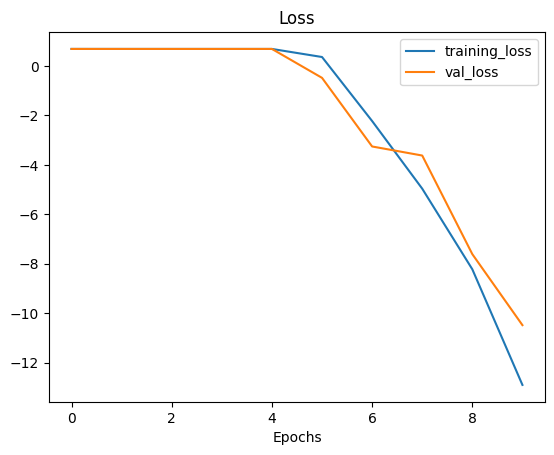

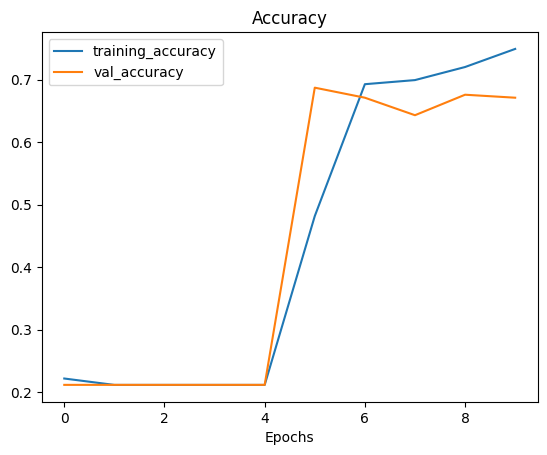

In [35]:
plot_loss_curves(model_history)
plt.show()

In [36]:
# Make predictions on the validation data

model_pred_probs = model.predict(x_test)
model_pred_probs.shape, model_pred_probs[:10]

92/92 [==============================] - 1s 7ms/step


((2928, 1),
 array([[0.7531701 ],
        [1.        ],
        [0.25335708],
        [0.08078113],
        [0.14915134],
        [1.        ],
        [0.11241458],
        [0.02959204],
        [0.03831107],
        [0.14474495]], dtype=float32))

In [37]:
# Convert prediction probabilities to prediction classes

model_preds = tf.squeeze(tf.round(model_pred_probs))
model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [38]:
# Calcuate model results

model_results = calculate_results(y_true=y_test, y_pred=model_preds)
model_results

c:\Users\kmnvz\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 67.11065573770492,
 'precision': 0.603621129033196,
 'recall': 0.6711065573770492,
 'f1': 0.6308642186804855}